In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
vaccine_df = pd.DataFrame(pd.read_csv(
    'covid.csv', 
    usecols=(
        'date', 
        'location', 
        'people_vaccinated_per_hundred', 
        'people_fully_vaccinated_per_hundred', 
        'total_boosters_per_hundred'
    )
))

In [23]:
vaccine_df.date = pd.to_datetime(vaccine_df.date)
vaccine_df = vaccine_df.loc[vaccine_df.date == pd.to_datetime('2021-12-30')]

In [24]:
vaccine_df = vaccine_df.dropna(subset=(
    'people_vaccinated_per_hundred', 
    'people_fully_vaccinated_per_hundred', 
    'total_boosters_per_hundred'
))

In [25]:
vaccine_df = vaccine_df.set_index(keys='location')

In [26]:
vaccine_df['percent_boosters'] = vaccine_df['total_boosters_per_hundred']
vaccine_df['percent_fully_vaccinated'] = (
    vaccine_df['people_fully_vaccinated_per_hundred'] - 
    vaccine_df['total_boosters_per_hundred']
)
vaccine_df['percent_partially_vaccinated'] = (
    vaccine_df['people_vaccinated_per_hundred'] - 
    vaccine_df['people_fully_vaccinated_per_hundred']
)

In [27]:
vaccine_df = vaccine_df.sort_values(by=['people_vaccinated_per_hundred'])

In [28]:
vaccine_df = vaccine_df.drop(
    columns=[
        'people_vaccinated_per_hundred', 
        'people_fully_vaccinated_per_hundred', 
        'total_boosters_per_hundred', 
        'date']
)
vaccine_df = vaccine_df.drop('Upper middle income')
vaccine_df = vaccine_df.drop('Lower middle income')

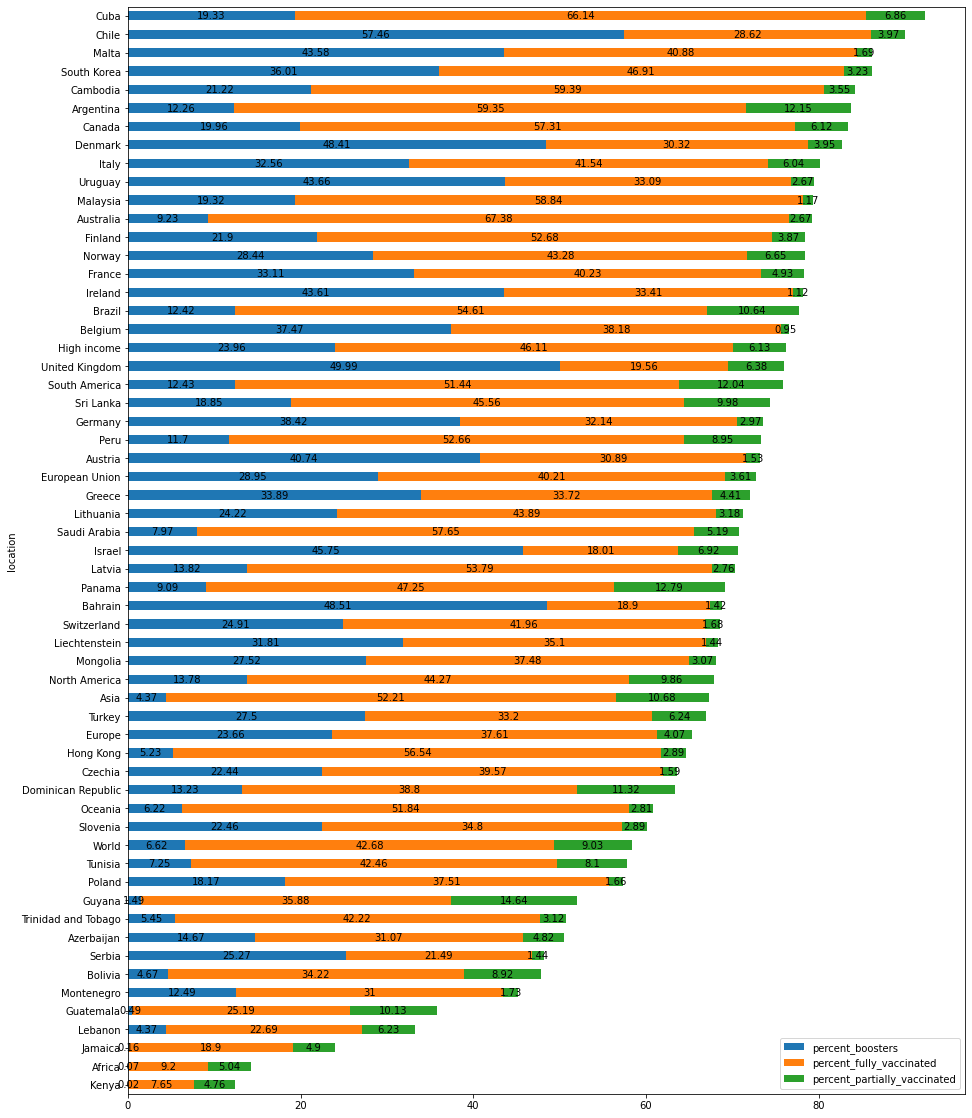

In [18]:
ax = vaccine_df.plot.barh(stacked=True, figsize=(15,20))
for c in ax.containers:
    ax.bar_label(c, label_type='center')

In [29]:
limited_countries = ['Cuba', 'South Korea', 'Canada', 'United States', 'Jamaica'][::-1]
limited_vaccine_df = vaccine_df.loc[limited_countries]

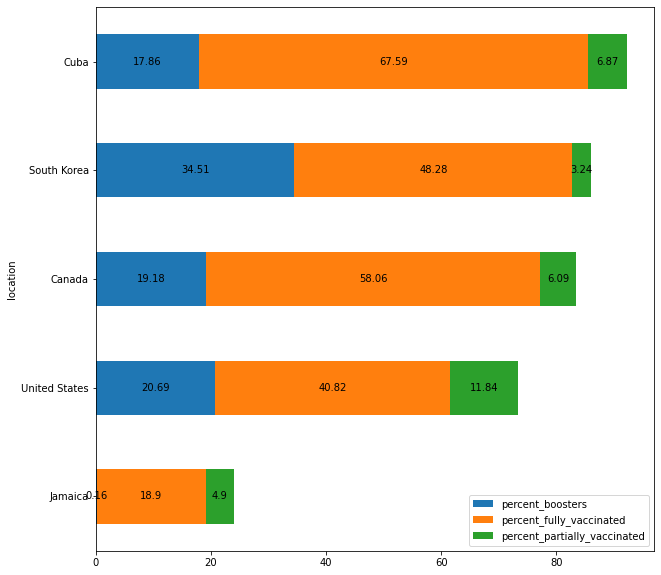

In [30]:
ax = limited_vaccine_df.plot.barh(stacked=True, figsize=(10,10))
for c in ax.containers:
    ax.bar_label(c, label_type='center')

In [31]:
cases_df = pd.DataFrame(pd.read_csv('covid.csv', usecols=['date', 'location', 'new_cases_smoothed_per_million']))
cases_df['date'] = pd.to_datetime(cases_df['date'])

In [32]:
cases_df = cases_df.set_index(['date', 'location'])['new_cases_smoothed_per_million'].unstack(1)

In [33]:
cases_df = cases_df[limited_countries]
cases_df = cases_df.dropna()

<AxesSubplot:xlabel='date'>

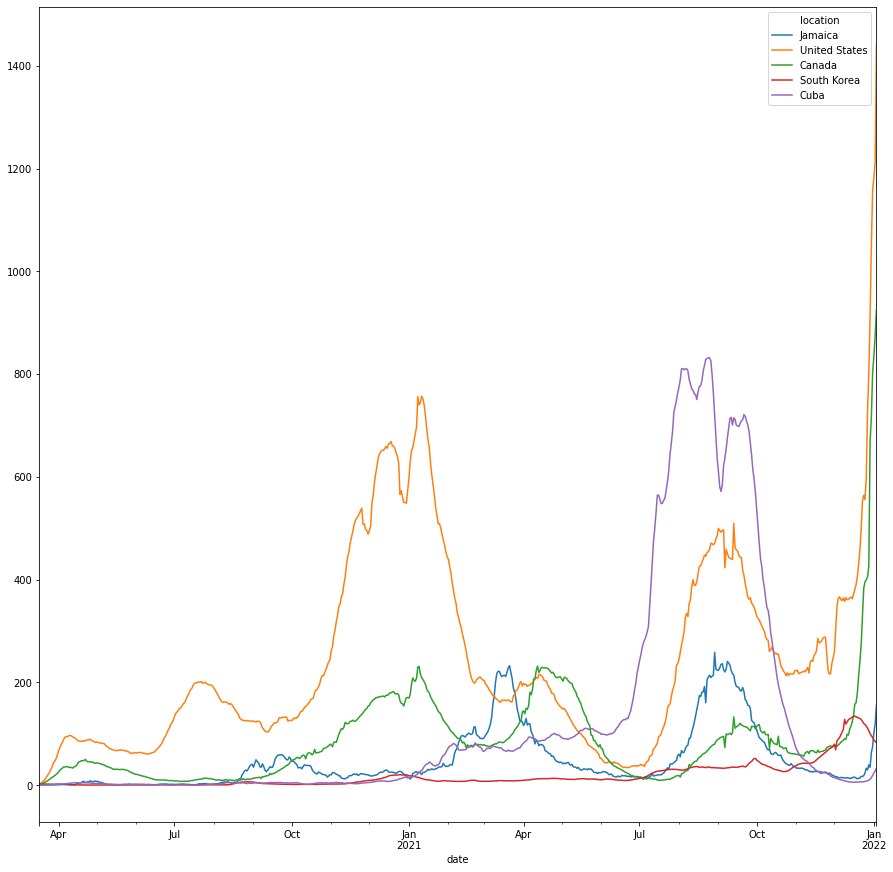

In [34]:
cases_df.plot(figsize=(15,15))

In [35]:
deaths_df = pd.DataFrame(pd.read_csv('covid.csv', usecols=['date', 'location', 'new_deaths_smoothed_per_million']))
deaths_df['date'] = pd.to_datetime(deaths_df['date'])

In [36]:
deaths_df = deaths_df.set_index(['date', 'location'])['new_deaths_smoothed_per_million'].unstack(1)

In [37]:
deaths_df = deaths_df[limited_countries]
deaths_df = deaths_df.dropna()

<AxesSubplot:xlabel='date'>

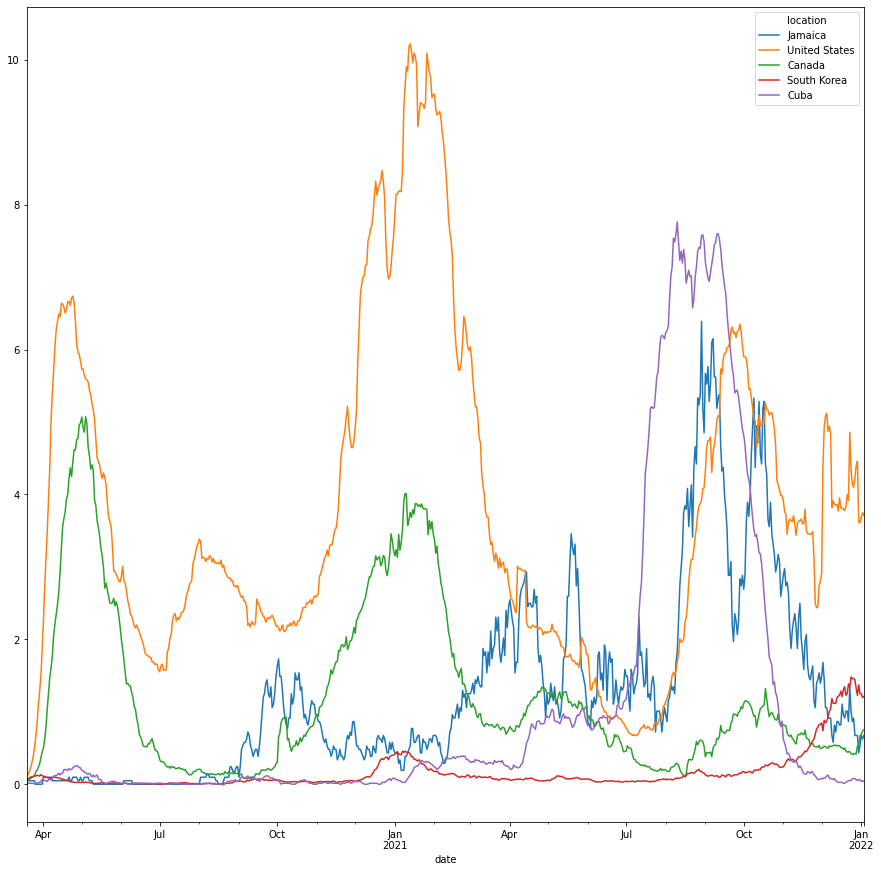

In [38]:
deaths_df.plot(figsize=(15,15))

In [141]:
columns_used = [
    'date', 
    'location', 
    'total_vaccinations_per_hundred', 
    'new_cases_smoothed_per_million', 
    'new_deaths_smoothed_per_million'
]

df = pd.DataFrame(pd.read_csv('covid.csv', usecols=columns_used))
df['date'] = pd.to_datetime(df['date'])

df = df.dropna()
df = df.set_index('date')

df['percent_vaccinated'] = df['total_vaccinations_per_hundred']
df['percent_new_cases'] = df['new_cases_smoothed_per_million'] / 10000
df['percent_new_deaths'] = df['new_deaths_smoothed_per_million'] / 10000
df['percent_new_deaths_per_cases'] = ( 
    df['new_deaths_smoothed_per_million'] / 
    df['new_cases_smoothed_per_million'] / 
    10000
)

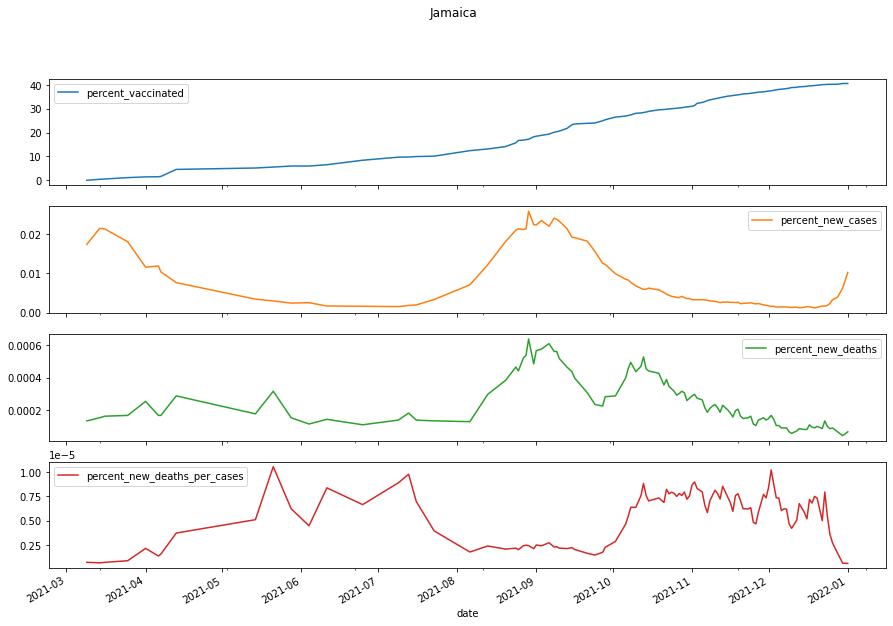

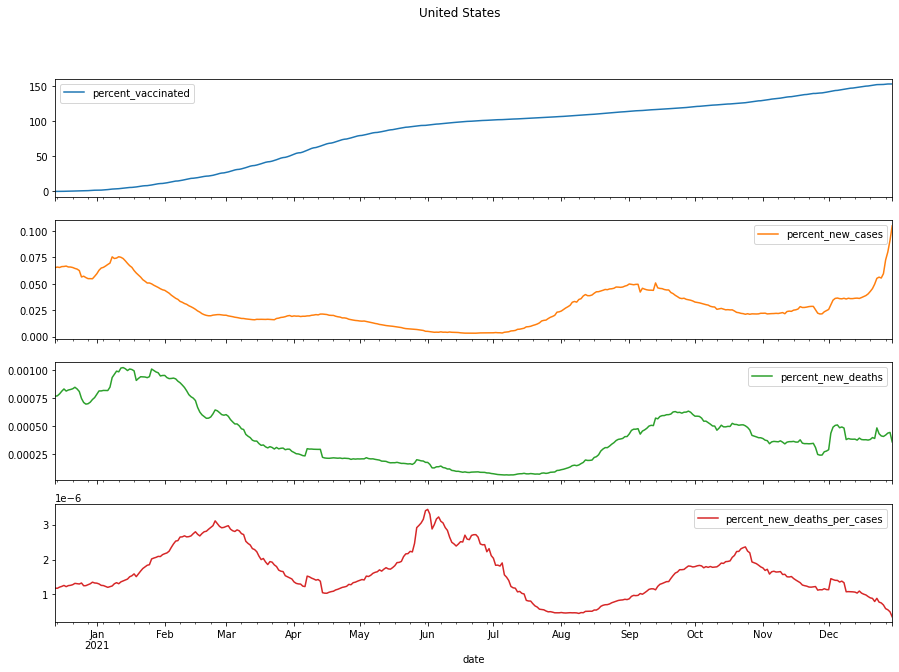

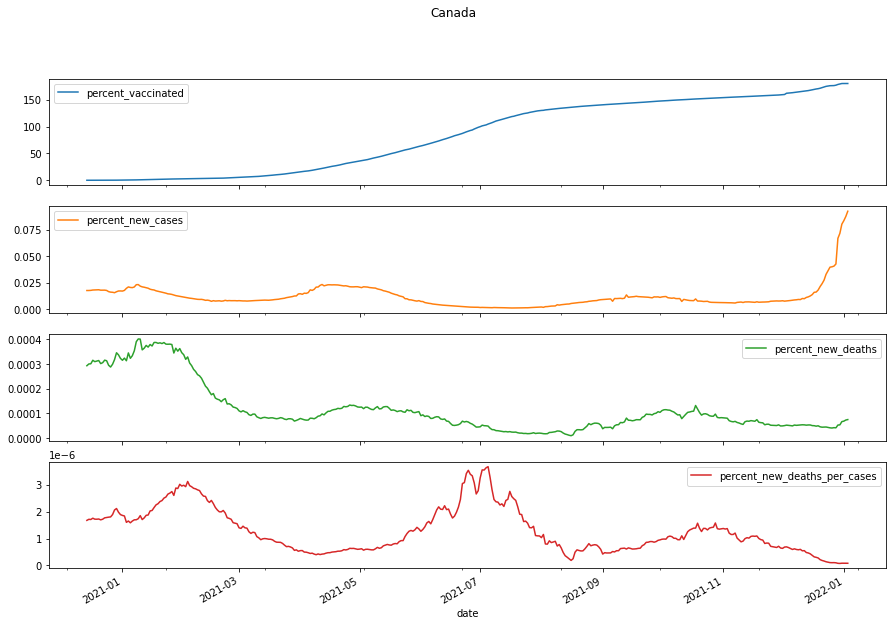

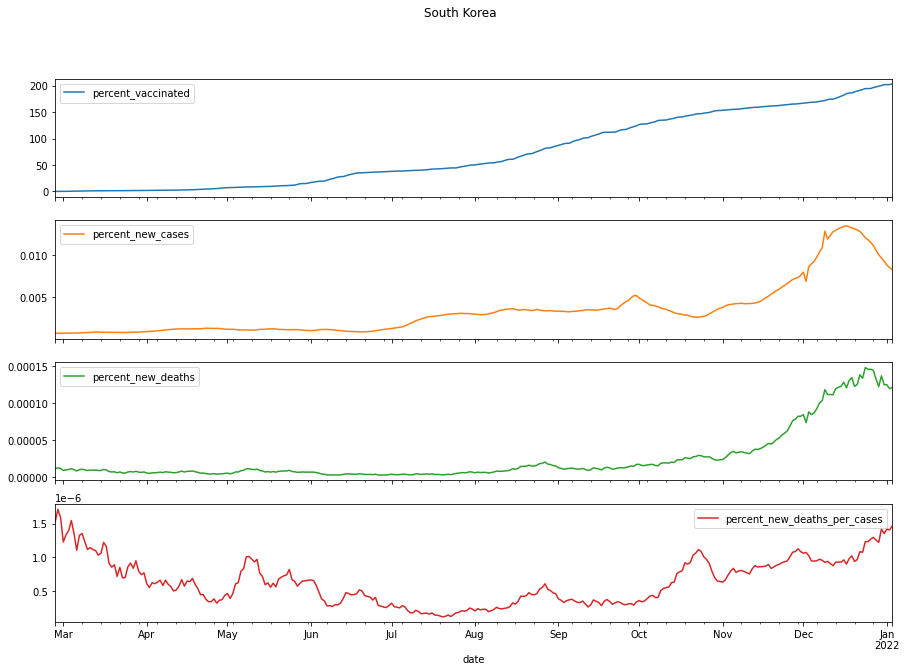

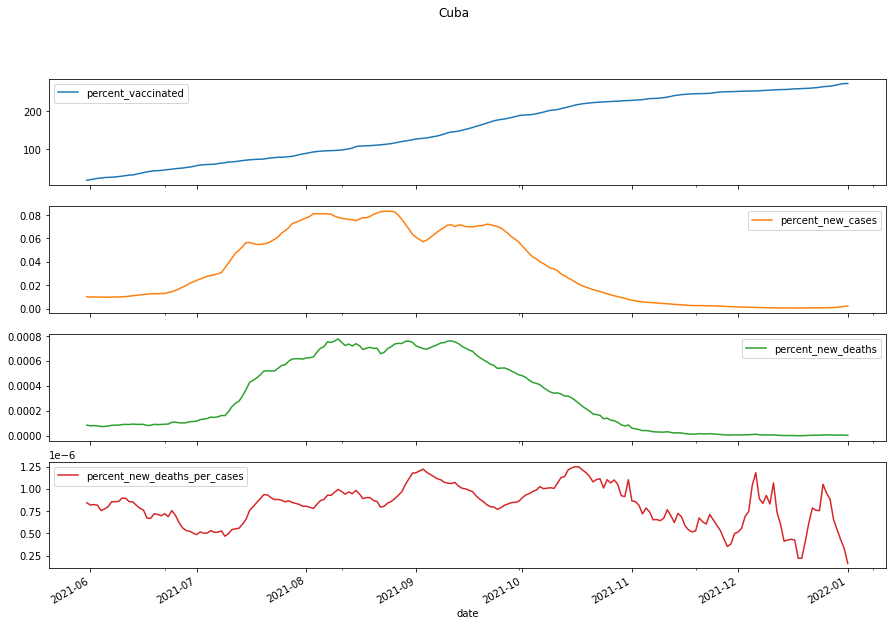

In [142]:
for country in limited_countries:
    country_df = df.loc[df['location'] == country]
    country_df = country_df[[
        'percent_vaccinated', 
        'percent_new_cases', 
        'percent_new_deaths', 
        'percent_new_deaths_per_cases'
    ]]
    country_df.plot(subplots=True, title=country, figsize=(15,10))